# Problem Statement:
You have been provided with the dataset that contains the information about the person and their salary range. Based on the given data, you need built a classification model using Naive Bayes Classification algorithm to predict the salary range of the person.
* You may also build other classification algorithms for complementary purpose.

# Importing the libraries

In [1]:
# For mathematical operations
import numpy as np

# For data manipulation
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt

# For data visualisation
import seaborn as sns

# For data cleaning
import re

# For loading the Naive Bayes Classification algorithm
from sklearn.naive_bayes import GaussianNB

# For loading the Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# For loading the Support Vector Classification algorithm
from sklearn.svm import SVC

# For loading the Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier

# For loading the Random Forest classifier and Extra Tree classifier algorithm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# For loading the KNeighbor Classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# Accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix 

# For splitting the data and cross validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV , cross_val_score

# Coverting categorical data into numerical form
from sklearn.preprocessing import LabelEncoder

# Importing the Dataset:

Dataset link: https://drive.google.com/file/d/1Y4ufnEQyE9vpSRaSzDLC5-_QZxd6bIif/view?usp=sharing

In [2]:
# Creating the list for columns names
cols = ['age', 'workclass', 'id', 'education', 'education_num', 'martial_status', 'occupation',
        'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'native_country', 'income']

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ayush/Devtown/Project-10 salary classification/salary_range.csv")

In [4]:
# Assigning the columns names to dataframe
df.columns = cols

# Exploratory Data Analysis(EDA) - Data Exploration(DE), Data Manupulation(DM), Data Cleaning(DC) and Data Visualization(DV)

In [5]:
# First five rows of dataframe
df.head()

,age,workclass,id,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
# Last five rows of dataframe
df.tail()

,age,workclass,id,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   id              32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   martial_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Shape of dataframe
df.shape

(32560, 15)

In [9]:
# Columns in dataframe
df.columns

Index(['age', 'workclass', 'id', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
# Sum of null values in each column of dataframe
df.isna().sum()

age               0
workclass         0
id                0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
# Sum of null values in whole dataset
df.isna().sum().sum()

0

In [12]:
# Statistical information of age column
df.age.describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [13]:
# Unique values in workclass column
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
# Sum of unique values in workclass column
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

* As there is a white space in the beginning of each value of the workclass columns we need to remove it.

In [15]:
for i in range(len(df.workclass)):
  df.workclass[i] = (re.sub('^\s', '', df.workclass[i]))

<ipython-input-15-fd2ed50f0d57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.workclass[i] = (re.sub('^\s', '', df.workclass[i]))


In [16]:
df.workclass[1]

'Private'

* Now the white space has been removed.

In [17]:
# Values in education column which are having the workclass as "?"
df['education'][df['workclass']=="?"].value_counts()

 HS-grad         532
 Some-college    514
 Bachelors       173
 11th            118
 10th            100
 7th-8th          72
 Assoc-voc        61
 9th              51
 Masters          48
 Assoc-acdm       47
 12th             40
 5th-6th          30
 Prof-school      18
 Doctorate        15
 1st-4th          12
 Preschool         5
Name: education, dtype: int64

* We have observed that when the education is "HS-grad" and "Some_college" the occurance of workclass as "?" is having the high frequency. 

In [18]:
# Finding the most occured value in workclass who are having the education as "HS-grad"
df['workclass'][df['education']==" HS-grad"].value_counts()

Private             7780
Self-emp-not-inc     866
?                    532
Local-gov            503
Self-emp-inc         279
State-gov            268
Federal-gov          263
Without-pay            9
Never-worked           1
Name: workclass, dtype: int64

In [19]:
# Finding the most occured value in workclass who are having the education as "Some-college"
df['workclass'][df['education']==" Some-college"].value_counts()

Private             5094
?                    514
Self-emp-not-inc     486
Local-gov            387
State-gov            325
Federal-gov          254
Self-emp-inc         226
Without-pay            3
Never-worked           2
Name: workclass, dtype: int64

* Based on the above two analysis we can replace the workclass which is having the values as "?" with "Private"

In [20]:
# Replacing in workclass column "?" with "Private"
df['workclass'] = df['workclass'].replace("?", "Private")

In [21]:
# Sum of unique values in workclass column
df.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

* Coverting all the various categories of government "Local-gov", "State-gov" and "Federal-gov" to a single "Government" category.

In [22]:
# Replacing in workclass column "Local-gov", "State-gov" and "Federal-gov" with "Government"
df['workclass'] = df['workclass'].replace(["Local-gov", "State-gov", "Federal-gov"],["Government", "Government", "Government"])

In [23]:
# Sum of unique values in workclass column
df.workclass.value_counts()

Private             24532
Government           4350
Self-emp-not-inc     2541
Self-emp-inc         1116
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [24]:
# Creating the object for label encoder
enc = LabelEncoder()

In [25]:
# Applying label encoder
df.workclass = enc.fit_transform(df.workclass)

In [26]:
# Sum of unique values in workclass column
df.workclass.value_counts()

2    24532
0     4350
4     2541
3     1116
5       14
1        7
Name: workclass, dtype: int64

 Substituted in workclass column:

Government    ->       0

Never-worked ->     1

Private     ->        2

Self-emp-inc        -> 3

Self-emp-not-inc    -> 4

Without-pay          ->  5





In [27]:
# As "id" is not having any significant effect on the price range so we are dropping it 
df.drop("id", axis = 1, inplace = True)

In [28]:
# Unique values in education column
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [29]:
# Sum of unique values in education column
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [30]:
# List of all the categories which belongs to school
lis = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad']

In [31]:
# Replacing the values in the lis as "School" category
df.education.replace(lis, ["School" for i in range(len(lis))], inplace = True)

In [32]:
# Sum of unique values in education column
df.education.value_counts()

School           14754
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: education, dtype: int64

* Removing the white space.

In [33]:
for i in range(len(df.education)):
  df.education[i] = re.sub('^\s', '', df.education[i])

<ipython-input-33-011baeedd893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[i] = re.sub('^\s', '', df.education[i])


In [34]:
# Sum of unique values in education column
df.education.value_counts()

School          14754
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [35]:
# Applying label encoder
df.education = enc.fit_transform(df.education)

In [36]:
# Sum of unique values in education column
df.education.value_counts()

6    14754
7     7291
2     5354
4     1723
1     1382
0     1067
5      576
3      413
Name: education, dtype: int64

Substituted in education column:


Assoc-acdm     ->  0

Assoc-voc    ->    1

Bachelors       -> 2

Doctorate -> 3

Masters       ->   4

Prof-school  ->     5

School      ->    6

In [37]:
# Statistical information of education_num column
df.education_num.describe()

count    32560.000000
mean        10.080590
std          2.572709
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education_num, dtype: float64

In [38]:
# Sum of unique values in martial_status column
df.martial_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial_status, dtype: int64

* Removing the white space.

In [39]:
for i in range(len(df.martial_status)):
  df.martial_status[i] = re.sub('^\s', '', df.martial_status[i])

<ipython-input-39-18d23c9f0d89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.martial_status[i] = re.sub('^\s', '', df.martial_status[i])


In [40]:
# Replacing in martial_status column "Separated" with "Divorced"
df.martial_status = df.martial_status.replace("Separated", "Divorced")

In [41]:
# Sum of unique values in martial_status column
df.martial_status.value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  5468
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: martial_status, dtype: int64

In [42]:
# Applying label encoder
df.martial_status = enc.fit_transform(df.martial_status)

In [43]:
# Sum of unique values in martial_status column
df.martial_status.value_counts()

2    14976
4    10682
0     5468
5      993
3      418
1       23
Name: martial_status, dtype: int64

Substituted for martial_status column:

Divorced                  -> 0

Married-AF-spouse  -> 1

Married-civ-spouse       -> 2

Married-spouse-absent     -> 3

Never-married            -> 4

Widowed                   -> 5 


In [44]:
# Sum of unique values in occupation column
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

* Removing the white space.

In [45]:
for i in range(len(df.occupation)):
  df.occupation[i] = re.sub('^\s', '', df.occupation[i])

<ipython-input-45-dce3fcafe21b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.occupation[i] = re.sub('^\s', '', df.occupation[i])


In [46]:
# Replacing in occupation column "?" with "Other-service"
df.occupation = df.occupation.replace("?", "Other-service")

In [47]:
# Sum of unique values in occupation column
df.occupation.value_counts()

Other-service        5138
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [48]:
# Applying label encoder
df.occupation = enc.fit_transform(df.occupation)

In [49]:
# Sum of unique values in occupation column
df.occupation.value_counts()

7     5138
9     4140
2     4099
3     4066
0     3769
11    3650
6     2002
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
Name: occupation, dtype: int64

Substituted for occupation column:


Adm-clerical     -> 0

Armed-Forces      -> 1

Craft-repair    -> 2

Exec-managerial    ->3

Farming-fishing     -> 4

Handlers-cleaners  -> 5

Machine-op-inspct  -> 6

Other-service    ->    7

Priv-house-serv    -> 8

Prof-specialty      -> 9

Protective-serv     -> 10

Sales             -> 11

Tech-support        -> 12

Transport-moving   -> 13



In [50]:
# Sum of unique values in relationship column
df.relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

* Removing the white space.

In [51]:
for i in range(len(df.relationship)):
  df.relationship[i] = re.sub('^\s', '', df.relationship[i])

<ipython-input-51-41365c0bca73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relationship[i] = re.sub('^\s', '', df.relationship[i])


In [52]:
# Replacing in relationship column "Husband", "Wife" with "Spouse"
df.relationship = df.relationship.replace(["Husband", "Wife"], ["Spouse", "Spouse"])

In [53]:
# Sum of unique values in relationship column
df.relationship.value_counts()

Spouse            14761
Not-in-family      8304
Own-child          5068
Unmarried          3446
Other-relative      981
Name: relationship, dtype: int64

In [54]:
# Applying label encoder
df.relationship = enc.fit_transform(df.relationship)

In [55]:
# Sum of unique values in relationship column
df.relationship.value_counts()

3    14761
0     8304
2     5068
4     3446
1      981
Name: relationship, dtype: int64

Substituted in relationship column:


Not-in-family   -> 0

Other-relative -> 1

Own-child       -> 2

Spouse         -> 3


Unmarried      -> 4

In [56]:
# Sum of unique values in race column
df.race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

* Removing the white space.

In [57]:
for i in range(len(df.race)):
  df.race[i] = re.sub('^\s', '', df.race[i])

<ipython-input-57-4a3975a03cb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.race[i] = re.sub('^\s', '', df.race[i])


In [58]:
# Sum of unique values in race column
df.race.value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [59]:
# Applying label encoder
df.race = enc.fit_transform(df.race)

In [60]:
# Sum of unique values in race column
df.race.value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: race, dtype: int64

Substituted in race column:

Amer-Indian-Eskimo    -> 0

Asian-Pac-Islander   -> 1

Black               ->   2

Other     -> 3

White             ->    4

In [61]:
# Sum of unique values in gender column
df.gender.value_counts()

 Male      21789
 Female    10771
Name: gender, dtype: int64

* Removing the white space.

In [62]:
for i in range(len(df.gender)):
  df.gender[i] = re.sub('^\s', '', df.gender[i])

<ipython-input-62-6a60ecb27106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[i] = re.sub('^\s', '', df.gender[i])


In [63]:
# Sum of unique values in gender column
df.gender.value_counts()

Male      21789
Female    10771
Name: gender, dtype: int64

In [64]:
# Applying label encoder
df.gender = enc.fit_transform(df.gender)

In [65]:
# Sum of unique values in gender column
df.gender.value_counts()

1    21789
0    10771
Name: gender, dtype: int64

Substituted in gender column:

Female    -> 0

Male   -> 1


In [66]:
# Sum of unique values in gender column
df.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

* Removing the white space.

In [67]:
for i in range(len(df.native_country)):
  df.native_country[i] = re.sub('^\s', '', df.native_country[i])

<ipython-input-67-e266f32891d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.native_country[i] = re.sub('^\s', '', df.native_country[i])


In [68]:
# Replacing in the native_country column "?" with "Others"
df.native_country = df.native_country.replace('?',"Others")

In [69]:
# Sum of unique values in native_country column
df.native_country.value_counts()

United-States                 29169
Mexico                          643
Others                          583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [70]:
# Unique values in native_country column
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Others', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [71]:
# Total no. of unique values in native_country column
df.native_country.nunique()

42

* As there are so many countries , so we will classify them into different continents based on the countries.

1. North America: United States, Cuba, Jamaica, Mexico, Puerto-Rico, Honduras,Canada, Outlying-US(Guam-USVI-etc), Haiti, Dominican-Republic, El-Salvador,Guatemala, Trinadad&Tobago, Nicaragua.(14)
2. South America: Columbia, Ecuador, Peru, South.(4)
3. Europe: England, Germany, Italy, Poland, Portugal, France, Yugoslavia,Scotland, Greece, Ireland, Holand-Netherlands, Hungary.(12)
4. Asia: India, Iran, Philippines, China, Japan, Cambodia, Thailand, Laos,Taiwan, Vietnam,Hong.(11)
5. Others:


* Creating the list of countries of each continent.

In [72]:
N_A = ['United-States', 'Cuba', 'Jamaica', 'Mexico', 'Puerto-Rico', 'Honduras','Canada', 'Outlying-US(Guam-USVI-etc)', 'Haiti', 'Dominican-Republic', 'El-Salvador','Guatemala', 'Trinadad&Tobago', 'Nicaragua']
S_A = ['Columbia', 'Ecuador', 'Peru', 'South']
E_U = ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Yugoslavia', 'Scotland', 'Greece', 'Ireland', 'Holand-Netherlands', 'Hungary']
A_S = ['India', 'Iran', 'Philippines', 'China', 'Japan', 'Cambodia', 'Thailand', 'Laos', 'Taiwan', 'Vietnam', 'Hong']

* Replacing the names of the countries with their continent names.

In [73]:
df.native_country = df.native_country.replace(N_A, ["North_America" for i in range(len(N_A))])
df.native_country = df.native_country.replace(S_A, ["South_America" for i in range(len(S_A))])
df.native_country = df.native_country.replace(E_U, ["Europe" for i in range(len(E_U))])
df.native_country = df.native_country.replace(A_S, ["Asia" for i in range(len(A_S))])

In [74]:
# Sum of unique values in native_country column
df.native_country.value_counts()

North_America    30587
Asia               671
Others             583
Europe             521
South_America      198
Name: native_country, dtype: int64

In [75]:
# Applying label encoder
df.native_country = enc.fit_transform(df.native_country)

In [76]:
# Sum of unique values in native_country column
df.native_country.value_counts()

2    30587
0      671
3      583
1      521
4      198
Name: native_country, dtype: int64

Substituted in native_country column:

Asia           -> 0

Europe       -> 1

North_America  -> 2

Others         -> 3

South_America   -> 4


In [77]:
# Sum of unique values in income column
df.income.value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

* Removing the white space.

In [78]:
for i in range(len(df.income)):
  df.income[i] = re.sub('^\s', '', df.income[i])

<ipython-input-78-955a883a5ff4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income[i] = re.sub('^\s', '', df.income[i])


In [79]:
# Sum of unique values in income column
df.income.value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

In [80]:
# Applying label encoder
df.income = enc.fit_transform(df.income)

In [81]:
# Sum of unique values in income column
df.income.value_counts()

0    24719
1     7841
Name: income, dtype: int64

Substituted in income column:



1. "<=50K"  as   0
2. ">50K"   as 1



In [82]:
# Top 5 rows of the dataframe
df.head()

,age,workclass,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,4,2,13,2,3,3,4,1,0,0,13,2,0
1,38,2,6,9,0,5,0,4,1,0,0,40,2,0
2,53,2,6,7,2,5,3,2,1,0,0,40,2,0
3,28,2,2,13,2,9,3,2,0,0,0,40,2,0
4,37,2,4,14,2,3,3,4,0,0,0,40,2,0


In [83]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   workclass       32560 non-null  int64
 2   education       32560 non-null  int64
 3   education_num   32560 non-null  int64
 4   martial_status  32560 non-null  int64
 5   occupation      32560 non-null  int64
 6   relationship    32560 non-null  int64
 7   race            32560 non-null  int64
 8   gender          32560 non-null  int64
 9   capital_gain    32560 non-null  int64
 10  capital_loss    32560 non-null  int64
 11  hours_per_week  32560 non-null  int64
 12  native_country  32560 non-null  int64
 13  income          32560 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


# Obseravtions:

1. Data Strength: 32460
2. No. of random variables: 15
3. None of the columns contained Null values
4. Columns - 'age', 'education_num', 'id', 'capital_gain','capital_loss' and 'hours_per_week' were having numerical value.
5. Columns - 'workclass', 'education','martial_status','occupation', 'relationship', 'race', 'gender','native_country' and 'income' were having categorical value.

In [84]:
# Finding the correlation of columns with each other
df.corr()

,age,workclass,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.043447,-0.057057,0.036527,-0.314968,-0.003110,0.150001,0.028718,0.088832,0.077674,0.057775,0.068756,-0.005543,0.234039
workclass,0.043447,1.000000,0.056230,-0.091685,-0.006301,-0.006267,0.026557,0.071763,0.105533,0.047029,0.007292,0.076716,0.013399,-0.001372
education,-0.057057,0.056230,1.000000,-0.597910,0.027926,-0.069854,0.017469,-0.021248,-0.021666,-0.054903,-0.046788,-0.107002,0.035310,-0.214188
education_num,0.036527,-0.091685,-0.597910,1.000000,-0.030827,0.081301,-0.015599,0.031825,0.012256,0.122627,0.079932,0.148127,-0.041704,0.335182
martial_status,-0.314968,-0.006301,0.027926,-0.030827,1.000000,0.031352,-0.248251,-0.031844,-0.046401,-0.035757,-0.027309,-0.175639,0.002028,-0.154967
occupation,-0.003110,-0.006267,-0.069854,0.081301,0.031352,1.000000,-0.011770,-0.002447,0.055873,0.020133,0.011726,0.006904,0.011103,0.044356
relationship,0.150001,0.026557,0.017469,-0.015599,-0.248251,-0.011770,1.000000,-0.011699,0.125091,0.037374,0.024888,0.062105,-0.002949,0.227110
race,0.028718,0.071763,-0.021248,0.031825,-0.031844,-0.002447,-0.011699,1.000000,0.087197,0.011143,0.018902,0.041910,0.220989,0.071853
gender,0.088832,0.105533,-0.021666,0.012256,-0.046401,0.055873,0.125091,0.087197,1.000000,0.048477,0.045572,0.229312,-0.004961,0.215995
capital_gain,0.077674,0.047029,-0.054903,0.122627,-0.035757,0.020133,0.037374,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.000423,0.223333


<Axes: >

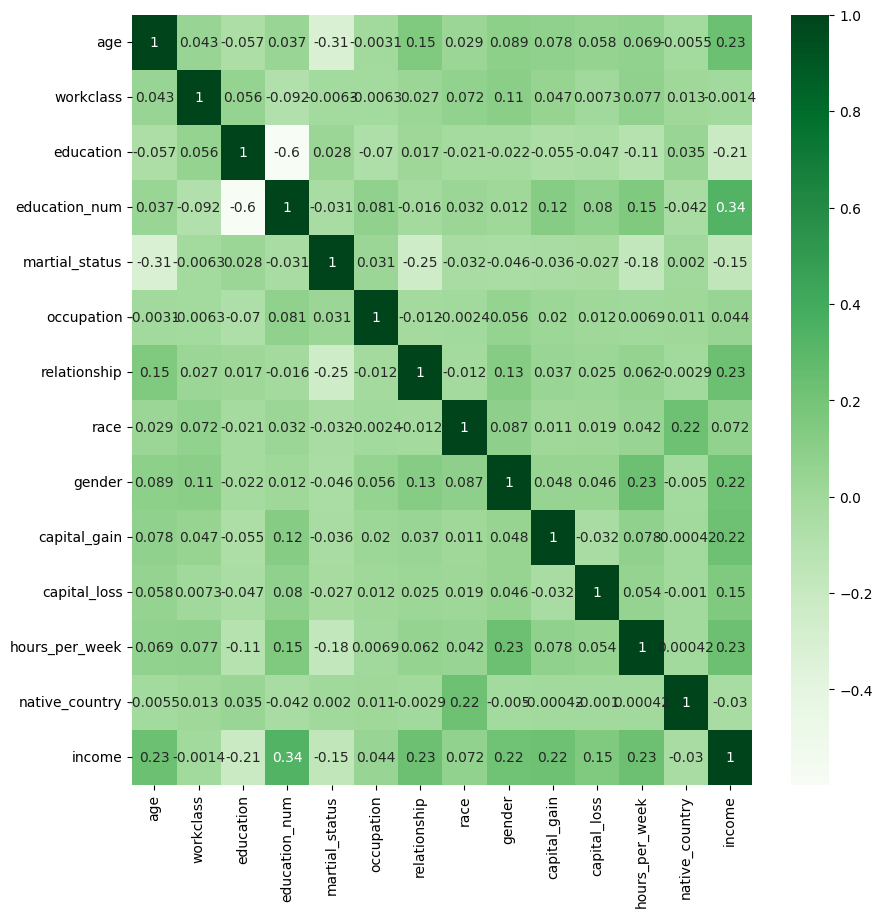

In [85]:
# Plotting the correlation using the heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

# Feature Selection
* As we are having a lot of features, we are using ExtraTreesRegressor for Feature Selection to take only most important features for making accurate prediction.

In [86]:
X = df.drop("income", axis = 1) #features
y = df.income #target

In [87]:
model = ExtraTreesClassifier()

In [88]:
model.fit(X, y)

ExtraTreesClassifier()

In [89]:
# Values of important features
model.feature_importances_

array([0.23131407, 0.03621703, 0.06493476, 0.08004603, 0.07345787,
       0.09024817, 0.0943183 , 0.01734295, 0.03518317, 0.09938564,
       0.03264469, 0.12872859, 0.01617874])

In [90]:
# Creating a series of feature importance value
imp_fea = pd.Series(model.feature_importances_, index = X.columns)

In [91]:
imp_fea

age               0.231314
workclass         0.036217
education         0.064935
education_num     0.080046
martial_status    0.073458
occupation        0.090248
relationship      0.094318
race              0.017343
gender            0.035183
capital_gain      0.099386
capital_loss      0.032645
hours_per_week    0.128729
native_country    0.016179
dtype: float64

Text(0.5, 1.0, 'Feature Importance Graph')

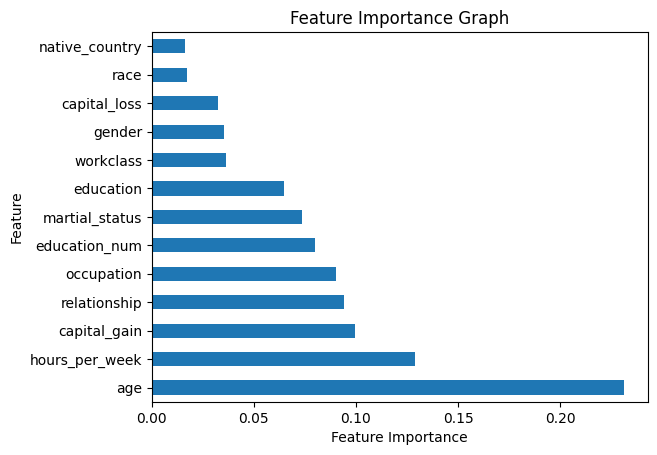

In [92]:
# Plotting Top 12 features w.r.t. the Target
imp_fea.nlargest(13).plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Graph")

* As there is no big change  between the features except the age, so we are considering all the features.

# MODEL SELECTION

* Defining the model/algorithm

In [93]:
nbc = GaussianNB()
lr = LogisticRegression()
svc = SVC()
dc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

# Splitting the dataset into training and testing sets

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [95]:
# Length of X_train
len(X_train)

26048

In [96]:
# Length of X_test
len(X_test)

6512

# Training the model

In [97]:
nbc.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
dc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

# Testing phase

In [98]:
# Making prediction
nbc_y_pred = nbc.predict(X_test)
lr_y_pred = lr.predict(X_test)
svc_y_pred = svc.predict(X_test)
dc_y_pred = dc.predict(X_test)
rfc_y_pred = rfc.predict(X_test)
knn_y_pred = knn.predict(X_test)

In [99]:
# Creating the dataframe
prediction = pd.DataFrame({
    'Actual': y_test,
    'NBC': nbc_y_pred,
    'LR': lr_y_pred,
    'SVC': svc_y_pred,
    'DTC': dc_y_pred,
    'RFC': rfc_y_pred,
    'KNN': knn_y_pred
})

In [100]:
prediction

,Actual,NBC,LR,SVC,DTC,RFC,KNN
14160,0,0,0,0,0,0,0
27047,0,0,0,0,1,1,1
28867,1,0,0,0,0,1,0
5667,1,0,0,0,1,0,0
7827,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
13307,1,0,0,0,0,0,1
1338,0,0,0,0,0,0,0
24534,0,0,0,0,0,0,0
18080,0,0,0,0,0,0,0


# Performance

In [101]:
print(f'NBC: {accuracy_score(y_test, nbc_y_pred)}')
print(f'LR: {accuracy_score(y_test, lr_y_pred)}')
print(f'SVC: {accuracy_score(y_test, svc_y_pred)}')
print(f'DTC: {accuracy_score(y_test, dc_y_pred)}')
print(f'RFC: {accuracy_score(y_test, rfc_y_pred)}')
print(f'KNN: {accuracy_score(y_test, knn_y_pred)}')

NBC: 0.8088144963144963
LR: 0.7977579852579852
SVC: 0.8023648648648649
DTC: 0.8135749385749386
RFC: 0.8508906633906634
KNN: 0.8415233415233415


* The accuracy score for:


1. NBC -> 81%
6. LR -> 80%
4. SVC -> 80%
2. DTC -> 81%
3. RFC -> 85%
5. KNN -> 84%




# Applying cross validation for Naive Bayes Model

In [102]:
# Accuracy score for setting the value of k as 1
score = cross_val_score(nbc, X, y, cv=50)

In [103]:
score

array([0.79447853, 0.80521472, 0.80368098, 0.80981595, 0.80368098,
       0.80214724, 0.79447853, 0.81595092, 0.79907975, 0.80828221,
       0.80030722, 0.78955453, 0.81105991, 0.79723502, 0.80952381,
       0.79877112, 0.81105991, 0.80030722, 0.8156682 , 0.80337942,
       0.81259601, 0.8156682 , 0.80030722, 0.80030722, 0.78648233,
       0.80030722, 0.80337942, 0.81105991, 0.81105991, 0.82642089,
       0.79416283, 0.79723502, 0.77265745, 0.78801843, 0.80184332,
       0.78648233, 0.82795699, 0.79416283, 0.8202765 , 0.79877112,
       0.80491551, 0.80952381, 0.80337942, 0.80184332, 0.79569892,
       0.8202765 , 0.8172043 , 0.79877112, 0.8187404 , 0.82334869])

In [104]:
# Minimum accuracy
min(score)

0.7726574500768049

In [105]:
# Maximum accuracy
max(score)

0.8279569892473119

In [106]:
# Mean accuracy
score.mean()

0.8043306663651013